Define Problem Statement ?

AI-Driven Energy Forecasting and Anomaly Detection for HVAC Systems used in buildings.

collecting data :  https://github.com/Dr-Dina-M-Ibrahim/A-dataset-for-residential-buildings-energy-consumption-with-statistical-and-machine-learning-analysi/blob/main/dataset%20for%20buildings%20energy%20consumption%20of%203840%20records.xlsx

Using supervised learning for Forecasting Energy. Model used is~ Linear Regression

Using Unsupervised learning for Anomaly Detection. Model used is~ K-means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the data

In [2]:

file_path = r"C:\Users\sarth\Downloads\dataset for buildings energy consumption of 3840 records.xlsx"
df = pd.read_excel(file_path)

print(df.shape)
print(df.head())
print(df.info())


(3847, 29)
   Unnamed: 0  Building Area m2  Floor Height m  Exterior Win Area  \
0         NaN            184.53             2.8            23.2485   
1         NaN            184.53             2.8            23.2485   
2         NaN            184.53             2.8            23.2485   
3         NaN            184.53             2.8            23.2485   
4         NaN            184.53             2.8            23.2485   

   Opaque Exterior Wall Area  \
0                    209.237   
1                    209.237   
2                    209.237   
3                    209.237   
4                    209.237   

   WWR %\n = 10-90% of Exterior Win (D) from Opaque Wall (E)  \
0                                               10.0           
1                                               10.0           
2                                               10.0           
3                                               10.0           
4                                               10.0   

Cleaning

In [3]:

print(df.isnull().sum())

df = df.drop_duplicates()

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])


Unnamed: 0                                                   3847
Building Area m2                                                7
Floor Height m                                                  7
Exterior Win Area                                               7
Opaque Exterior Wall Area                                       7
WWR %\n = 10-90% of Exterior Win (D) from Opaque Wall (E)       7
Win U-value (W/m2K)                                             7
Roof U-value (W/m2K)                                            7
Wall U-value (W/m2K)                                            7
Cooling MWh                                                     7
Heating MWh                                                     7
Total Energy MWh                                                7
Cooling KWh/m2.yr                                               7
Heating KWh/m2.yr                                               7
Total Energy KWh/m2.yr                                          7
Unnamed: 1

       Unnamed: 0  Building Area m2  Floor Height m  Exterior Win Area  \
count         0.0       3840.000000     3840.000000        3840.000000   
mean          NaN        165.195000        2.900000         110.079035   
std           NaN         19.337518        0.100013          63.116830   
min           NaN        145.860000        2.800000          19.630100   
25%           NaN        145.860000        2.800000          62.045200   
50%           NaN        165.195000        2.900000         110.702050   
75%           NaN        184.530000        3.000000         164.321350   
max           NaN        184.530000        3.000000         217.370500   

       Opaque Exterior Wall Area  \
count                3840.000000   
mean                  110.079065   
std                    63.116831   
min                    19.630100   
25%                    62.045200   
50%                   110.702100   
75%                   164.321425   
max                   217.370500   

       W

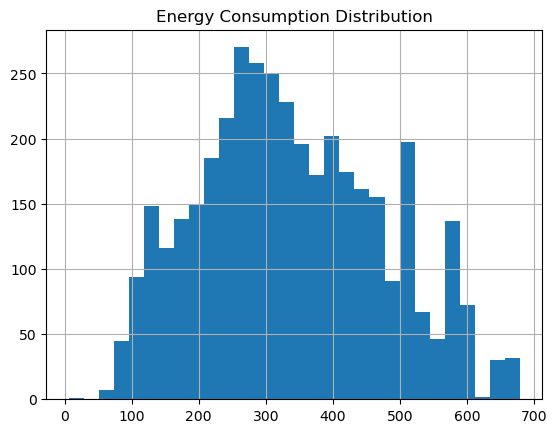

In [4]:
# Summary
print(df.describe())

# Quick distribution plots
import matplotlib.pyplot as plt

df['Total Energy KWh/m2.yr'].hist(bins=30)
plt.title("Energy Consumption Distribution")
plt.show()

In [5]:

if 'Date' in df.columns:
    df['Hour'] = df['Date'].dt.hour
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month


Save cleaned dataset

In [6]:
df.to_csv("cleaned_energy_consumption.csv", index=False)


WEEK 2 WORK ,SELECT AND TRAIN MODEL

In [7]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Load dataset
file_path = r"C:\Users\sarth\Downloads\dataset for buildings energy consumption of 3840 records.xlsx"
df = pd.read_excel(file_path)

print(df.columns.tolist())

['Unnamed: 0', 'Building Area m2', 'Floor Height m', 'Exterior Win Area', 'Opaque Exterior Wall Area', 'WWR %\n = 10-90% of Exterior Win (D) from Opaque Wall (E)', 'Win U-value (W/m2K)', 'Roof U-value (W/m2K)', 'Wall U-value (W/m2K)', 'Cooling MWh', 'Heating MWh', 'Total Energy MWh', 'Cooling KWh/m2.yr', 'Heating KWh/m2.yr', 'Total Energy KWh/m2.yr', 'Unnamed: 15', 'Unnamed: 16', 'c', 'h', 'cp', 'hp', 'c-cp', 'cp-c', 'h-hp', 'hp-h', 'c er2', 'h er2', 'mre', 'Unnamed: 28']


HANDLE COMMAS AND SPACES

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
print(df.columns.tolist())


['unnamed:_0', 'building_area_m2', 'floor_height_m', 'exterior_win_area', 'opaque_exterior_wall_area', 'wwr_%\n_=_10_90%_of_exterior_win_(d)_from_opaque_wall_(e)', 'win_u_value_(w/m2k)', 'roof_u_value_(w/m2k)', 'wall_u_value_(w/m2k)', 'cooling_mwh', 'heating_mwh', 'total_energy_mwh', 'cooling_kwh/m2.yr', 'heating_kwh/m2.yr', 'total_energy_kwh/m2.yr', 'unnamed:_15', 'unnamed:_16', 'c', 'h', 'cp', 'hp', 'c_cp', 'cp_c', 'h_hp', 'hp_h', 'c_er2', 'h_er2', 'mre', 'unnamed:_28']


SUPERVISE AND UNSUPERVISE MODEL TRAINING


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3846 entries, 0 to 3846
Data columns (total 25 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   building_area_m2                                          3840 non-null   float64
 1   floor_height_m                                            3840 non-null   float64
 2   exterior_win_area                                         3840 non-null   float64
 3   opaque_exterior_wall_area                                 3840 non-null   float64
 4   wwr_%
_=_10_90%_of_exterior_win_(d)_from_opaque_wall_(e)  3840 non-null   float64
 5   win_u_value_(w/m2k)                                       3840 non-null   float64
 6   roof_u_value_(w/m2k)                                      3840 non-null   float64
 7   wall_u_value_(w/m2k)                                      3840 non-null   float64
 8   cooling_mwh       

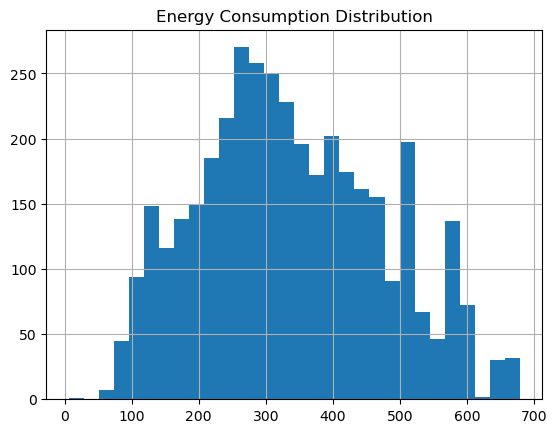

Linear Regression Results:
MSE: 79.62564549929667
R²: 0.8442748618936236


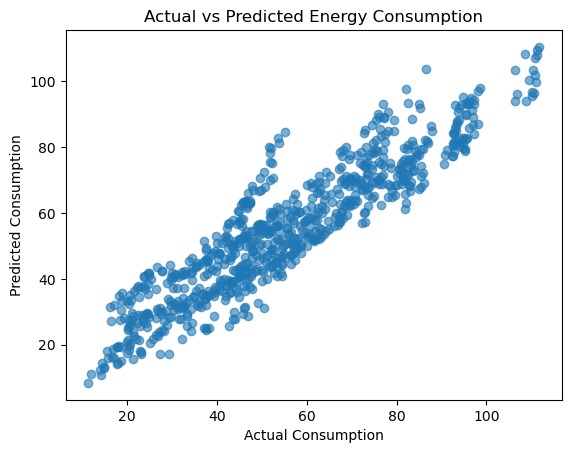

c:\Users\sarth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


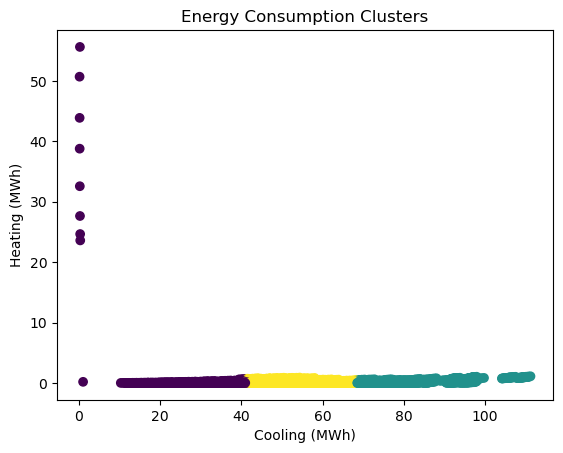

In [9]:
df = df.drop_duplicates()
df = df.loc[:, ~df.columns.str.contains('^unnamed')]
print(df.info())


df['total_energy_kwh/m2.yr'].hist(bins=30)
plt.title("Energy Consumption Distribution")
plt.show()


#  SUPERVISED LEARNING (FORECASTING)


X = df[['building_area_m2', 'floor_height_m', 'exterior_win_area',
        'opaque_exterior_wall_area', 'win_u_value_(w/m2k)',
        'roof_u_value_(w/m2k)', 'wall_u_value_(w/m2k)']]

y = df['total_energy_mwh']

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Consumption")
plt.ylabel("Predicted Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()



# 2. UNSUPERVISED LEARNING (ANOMALY DETECTION)

X_clustering = df[['cooling_mwh', 'heating_mwh', 'total_energy_mwh']]

# Handle missing values 
X_clustering = X_clustering.fillna(X_clustering.mean())

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clustering)

# Plot clusters
plt.scatter(df['cooling_mwh'], df['heating_mwh'], c=df['cluster'], cmap='viridis')
plt.xlabel("Cooling (MWh)")
plt.ylabel("Heating (MWh)")
plt.title("Energy Consumption Clusters")
plt.show()


Save Result

In [10]:
df.to_csv("week2_results_with_clusters.csv", index=False)
